![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/named_entity_recognition_(NER)/NLU_ner_ONTO_18class_example.ipynb.ipynb)

# Named-entity recognition with Deep Learning ONTO NOTES

Named-Entity recognition is a well-known technique in information extraction it is also known as entity identification, entity chunking and entity extraction.   Knowing the relevant tags for each article help in automatically categorizing the articles in defined hierarchies and enable smooth content discovery. This pipeline is based on NerDLApproach annotator with Char CNN - BiLSTM and GloVe Embeddings on the OntoNotes corpus and supports the identification of 18 entities.


Following NER classes can be detected by this model




|Type | 	Description |
|------|--------------|
| PERSON | 	People, including fictional like **Harry Potter** |
| NORP | 	Nationalities or religious or political groups like the **Germans** |
| FAC | 	Buildings, airports, highways, bridges, etc. like **New York Airport** |
| ORG | 	Companies, agencies, institutions, etc. like **Microsoft** |
| GPE | 	Countries, cities, states. like **Germany** |
| LOC | 	Non-GPE locations, mountain ranges, bodies of water. Like the **Sahara desert**|
| PRODUCT | 	Objects, vehicles, foods, etc. (Not services.) like **playstation** |
| EVENT | 	Named hurricanes, battles, wars, sports events, etc. like **hurricane Katrina**|
| WORK_OF_ART | 	Titles of books, songs, etc. Like **Mona Lisa** |
| LAW | 	Named documents made into laws. Like : **Declaration of Independence** |
| LANGUAGE | 	Any named language. Like **Turkish**|
| DATE | 	Absolute or relative dates or periods. Like every second **friday**|
| TIME | 	Times smaller than a day. Like **every minute**|
| PERCENT | 	Percentage, including ”%“. Like **55%** of workers enjoy their work |
| MONEY | 	Monetary values, including unit. Like **50$** for those pants |
| QUANTITY | 	Measurements, as of weight or distance. Like this person weights **50kg** |
| ORDINAL | 	“first”, “second”, etc. Like David placed **first** in the tournament |
| CARDINAL | 	Numerals that do not fall under another type. Like **hundreds** of models are avaiable in NLU |

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
 
! pip install  nlu pyspark==2.4.7 > /dev/null



Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple
     |████████████████████████████████| 163kB 5.7MB/s 
     |████████████████████████████████| 143kB 7.6MB/s 


# NLU makes NER easy. 

You just need to load the NER model via ner.load() and predict on some dataset.    
It could be a pandas dataframe with a column named text or just an array of strings.

In [ ]:
import nlu 

example_text =  ['People, including fictional like Harry Potter.',
'Nationalities or religious or political groups like Germans.',
'Buildings, airports, highways, bridges, etc. like New York Airport',
'Companies, agencies, institutions, etc. like Microsoft',
'Countries, cities, states. like Germany',
'Non-GPE locations, mountain ranges, bodies of water. Like Sahara Destert',
'Objects, vehicles, foods, etc. (Not services.) Like the a  or playstation or Playstation',
'Named hurricanes, battles, wars, sports events, etc. like hurricane Katrina',
'Titles of books, songs, etc. Like the Mona Lisa',
'Named documents made into laws. Like the Declaration of Independence',
'Any named language. Like English',
'Absolute or relative dates or periods. Like every second friday',
'Times smaller than a day. Like every minute',
'Percentage, including ”%“. Like 55% of workers enjoy their work',
'Monetary values, including unit. Like 50$ for those pants',
'Measurements, as of weight or distance. Like this person weights 50kg',
'“first”, “second”, etc. Like David place first in the tournament',
'Numerals that do not fall under another type. Like hundreds of models are avaiable in NLU',]
nlu.load('ner.onto').predict(example_text)

onto_recognize_entities_sm download started this may take some time.
Approx size to download 159 MB
[OK!]


,embeddings,entities,token,entities_confidence,ner_confidence
origin_index,,,,,
0,"[0.2901900112628937, 0.8049700260162354, 0.311...",[Harry Potter],People,[PERSON],0.999600
0,"[-0.10767000168561935, 0.11052999645471573, 0....",[Harry Potter],",",[PERSON],0.995300
0,"[0.013899999670684338, 0.39162999391555786, 0....",[Harry Potter],including,[PERSON],0.953400
0,"[-0.20130999386310577, -0.14045000076293945, 0...",[Harry Potter],fictional,[PERSON],0.883800
0,"[-0.2687000036239624, 0.817080020904541, 0.698...",[Harry Potter],like,[PERSON],0.965100
...,...,...,...,...,...
17,"[-0.453359991312027, 0.5522699952125549, 0.218...","[hundreds, NLU]",models,"[CARDINAL, ORG]",0.681000
17,"[-0.5153300166130066, 0.8318600058555603, 0.22...","[hundreds, NLU]",are,"[CARDINAL, ORG]",0.920500
17,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[hundreds, NLU]",avaiable,"[CARDINAL, ORG]",0.841900


In [ ]:
text = ["Barclays misled shareholders and the public about one of the biggest investments in the bank's history, a BBC Panorama investigation has found.",
"The bank announced in 2008 that Manchester City owner Sheikh Mansour had agreed to invest more than £3bn.",
"But the BBC found that the money, which helped Barclays avoid a bailout by British taxpayers, actually came from the Abu Dhabi government.",
"Barclays said the mistake in its accounts was 'a drafting error'.",
"Unlike RBS and Lloyds TSB, Barclays narrowly avoided having to request a government bailout late in 2008 after it was rescued by £7bn worth of new investment, most of which came from the Gulf states of Qatar and Abu Dhabi.",
"The S&P 500's price to earnings multiple is 71% higher than Apple's, and if Apple were simply valued at the same multiple, its share price would be $840, which is 52% higher than its current price.",
"Alice has a cat named Alice and also a dog named Alice and also a parrot named Alice, it is her favorite name!"
] + example_text
ner_df = nlu.load('ner.onto').predict(text, output_level='chunk')

onto_recognize_entities_sm download started this may take some time.
Approx size to download 159 MB
[OK!]


## Lets explore our data which the predicted NER tags and visalize them!    

We specify [1:] so we dont se the count for the O-tag wich is the most common, since most words in a sentence are not named entities and thus not part of a chunk

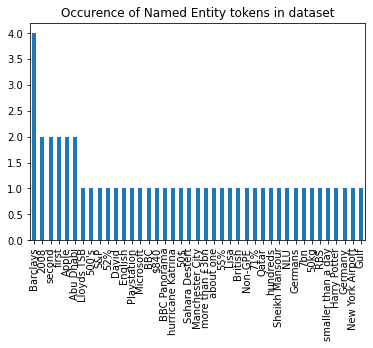

In [ ]:
ner_df['entities'].value_counts()[1:].plot.bar(title='Occurence of Named Entity tokens in dataset')

In [ ]:
ner_df

,entities_class,embeddings,entities,ner_confidence
origin_index,,,,
0,ORG,"[[0.044123999774456024, -0.47940999269485474, ...",Barclays,"[0.9980999827384949, 1.0, 0.9994999766349792, ..."
0,CARDINAL,"[[0.044123999774456024, -0.47940999269485474, ...",about one,"[0.9980999827384949, 1.0, 0.9994999766349792, ..."
0,ORG,"[[0.044123999774456024, -0.47940999269485474, ...",BBC Panorama,"[0.9980999827384949, 1.0, 0.9994999766349792, ..."
1,DATE,"[[-0.03819400072097778, -0.24487000703811646, ...",2008,"[0.9997000098228455, 0.848800003528595, 0.9908..."
1,GPE,"[[-0.03819400072097778, -0.24487000703811646, ...",Manchester City,"[0.9997000098228455, 0.848800003528595, 0.9908..."
1,PERSON,"[[-0.03819400072097778, -0.24487000703811646, ...",Sheikh Mansour,"[0.9997000098228455, 0.848800003528595, 0.9908..."
1,MONEY,"[[-0.03819400072097778, -0.24487000703811646, ...",more than £3bn,"[0.9997000098228455, 0.848800003528595, 0.9908..."
2,ORG,"[[-0.05707800015807152, 0.3987399935722351, 0....",BBC,"[0.9998999834060669, 0.9825999736785889, 1.0, ..."
2,ORG,"[[-0.05707800015807152, 0.3987399935722351, 0....",Barclays,"[0.9998999834060669, 0.9825999736785889, 1.0, ..."


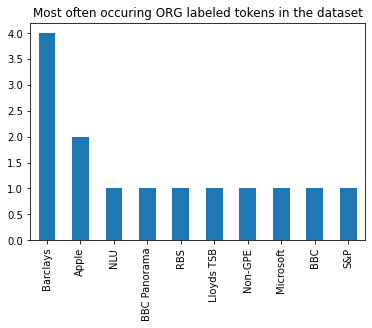

In [ ]:
ner_type_to_viz = 'ORG'
ner_df[ner_df.entities_class == ner_type_to_viz]['entities'].value_counts().plot.bar(title='Most often occuring ORG labeled tokens in the dataset')

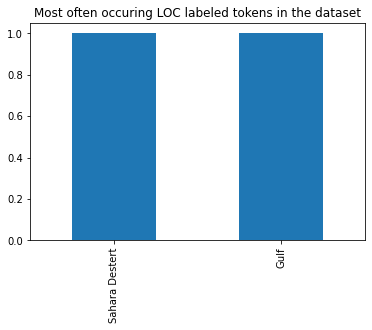

In [ ]:
ner_type_to_viz = 'LOC'
ner_df[ner_df.entities_class == ner_type_to_viz]['entities'].value_counts().plot.bar(title='Most often occuring LOC labeled tokens in the dataset')

In [ ]:
ss